In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt

In [11]:
# Get the current working directory
current_directory = os.getcwd()
# Go one step up from the current directory
parent_directory = os.path.dirname(current_directory)
print(parent_directory)
# Enter another directory inside the parent directory
target_directory = os.path.join(parent_directory, 'dataset', 'Ohio2018_processed', 'train')
print(target_directory)
# Check if the target directory exists
if os.path.exists(target_directory) and os.path.isdir(target_directory):
    print("The target directory exists.")
else:
    print("The target directory does not exist.")

C:\Users\julia\Desktop\Studium_MA5\DataDrivenDiabetesManagement\Project\git\DataDrivenDiabetesSemesterProject
C:\Users\julia\Desktop\Studium_MA5\DataDrivenDiabetesManagement\Project\git\DataDrivenDiabetesSemesterProject\dataset\Ohio2018_processed\train
The target directory exists.


In [12]:
# Enter file name 
file_name= "563-ws-training_processed.csv"
file_path = os.path.join(target_directory, file_name)
print(file_path)

C:\Users\julia\Desktop\Studium_MA5\DataDrivenDiabetesManagement\Project\git\DataDrivenDiabetesSemesterProject\dataset\Ohio2018_processed\train\563-ws-training_processed.csv


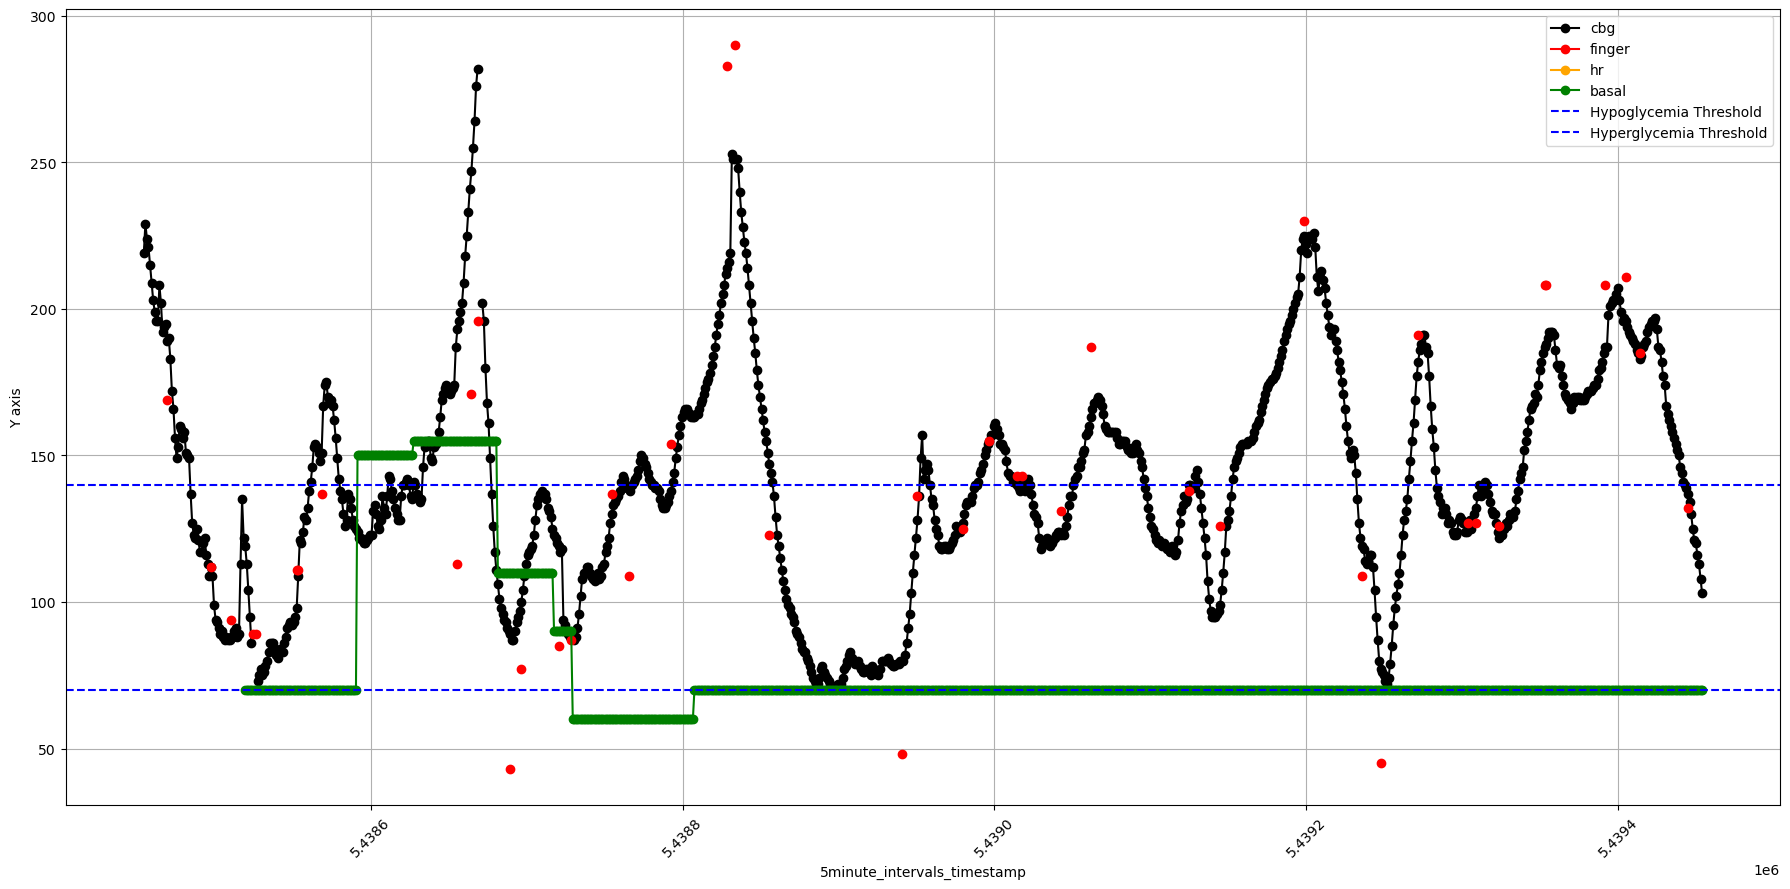

In [13]:
# Load specific patient excel path 
#file_path = r'C:\UniBern\DataDrivenDiabetes\Ohio_Data\Ohio2018_processed\train\563-ws-training_processed.csv'

# Load the CSV file into a pandas dataframe
df = pd.read_csv(file_path)

###################################### # code what you want in/out
# Filter rows where 'missing_cbg' is 0 (binary variable) -> this fills holes in cbg line
# filtered_df = df[df['missing_cbg'] == 0].head(1000)

# Or not, I still prefer only taking the first 1000 entries so I can see x,y relationship better
filtered_df = df.head(1000)
#####################################

# Plot lines
plt.figure(figsize=(18, 9))
plt.plot(filtered_df['5minute_intervals_timestamp'], filtered_df['cbg'], marker='o', linestyle='-', color='black', label='cbg')
plt.plot(filtered_df['5minute_intervals_timestamp'], filtered_df['finger'], marker='o', linestyle='-', color='red', label='finger')
plt.plot(filtered_df['5minute_intervals_timestamp'], filtered_df['hr'], marker='o', linestyle='-', color='orange', label='hr')

#TODO ADD bolus data to plot 

# I multipled the basal by 100 just so its easier to see in plot
plt.plot(filtered_df['5minute_intervals_timestamp'], filtered_df['basal']*100, marker='o', linestyle='-', color='green', label='basal')

# Variables that we can still plot and see what happens etc. -> hr, gsr, carbInput, bolus
# What I think they mean: hr>heart rate, gsr>Galvanic skin response, carbInput -> carb in grams?, 
# bolus> Insulin delivered to the patient, typically before a meal or when the patient is hyperglycemic.

# Horizontal line representing for hyper- and hypoglycemia, maybe it helps us see 
hypoglycemia_threshold = 70  # Not 100% sure about the value 
plt.axhline(y=hypoglycemia_threshold, color='blue', linestyle='--', label='Hypoglycemia Threshold')
hyperglycemia_threshold = 140 # Not 100% sure about the value 
plt.axhline(y=hyperglycemia_threshold, color='blue', linestyle='--', label='Hyperglycemia Threshold')

plt.xlabel('5minute_intervals_timestamp')
plt.ylabel('Y axis')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



### Load Dataset
not finished, someone can continue

In [14]:
# Path to the data folder
data_folder = os.path.join(parent_directory, 'dataset')
print(data_folder)

C:\Users\julia\Desktop\Studium_MA5\DataDrivenDiabetesManagement\Project\git\DataDrivenDiabetesSemesterProject\dataset


In [38]:
#data_folder = r'C:\Ohio_Data'

# List of patient excel IDs in the year folders
patient_ids_2018 = [559, 563, 570, 575, 588, 591]
patient_ids_2020 = [540, 544, 552, 567, 584, 596]

train_set = []
test_set = []

# For 2018 data
for patient_id in patient_ids_2018:
    for folder_type in ['training', 'testing']:
        file_name = f"{patient_id}-ws-{folder_type}_processed.csv"
        print(f"Load file: {file_name}")
        file_path = os.path.join(data_folder, 'Ohio2018_processed', folder_type[:-3], file_name)
        if os.path.exists(file_path): 
            patient_data = pd.read_csv(file_path)
            train_set.append(patient_data) if folder_type == 'training' else test_set.append(patient_data)
        else:
            print(f"File not found: {file_path}")
            raise FileNotFoundError("The target directory does not exist.")

Load file: 559-ws-training_processed.csv
Load file: 559-ws-testing_processed.csv
Load file: 563-ws-training_processed.csv
Load file: 563-ws-testing_processed.csv
Load file: 570-ws-training_processed.csv
Load file: 570-ws-testing_processed.csv
Load file: 575-ws-training_processed.csv
Load file: 575-ws-testing_processed.csv
Load file: 588-ws-training_processed.csv
Load file: 588-ws-testing_processed.csv
Load file: 591-ws-training_processed.csv
Load file: 591-ws-testing_processed.csv


In [35]:
print(len(train_set))
print(len(test_set))

6
6


In [19]:
test = "training"
test[:-3]

'train'